In [123]:
import numpy as np 
from numpy import asarray
import pandas as pd
import matplotlib.pyplot as plt 
import PIL as pil 
from PIL import Image 
import cv2
import os
from skimage import io 


In [124]:
path='C:/Users/kikok/Desktop/QMIND/dataset_images/007-0283-000.jpg'
image=Image.open(path)

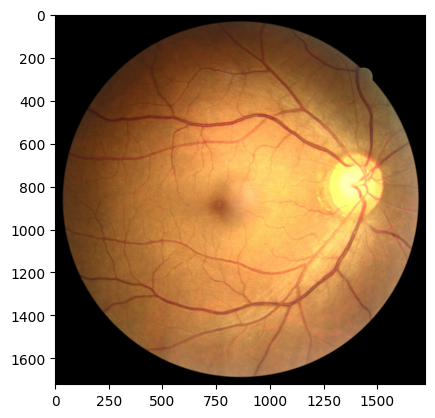

In [125]:
plt.imshow(image)

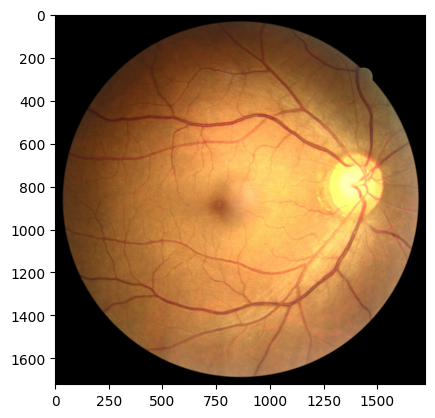

In [126]:
image2=image
plt.imshow(image2)


In [127]:
pixels=asarray(image2)
pixels=pixels.astype("float32")
print(pixels)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [128]:
img = cv2.imread(path)


In [129]:
if img is None:
    print("Error loading image")
else:
    lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab_img)

In [130]:
equ = cv2.equalizeHist(l)

In [131]:
updated_lab_img1 = cv2.merge((equ,a,b))
hist_eq_img = cv2.cvtColor(updated_lab_img1, cv2.COLOR_LAB2BGR)

In [132]:
#Apply CLAHE to L channel
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
clahe_img = clahe.apply(l)

In [133]:
#Combine the CLAHE enhanced L-channel back with A and B channels
updated_lab_img2 = cv2.merge((clahe_img,a,b))

In [134]:
#Convert LAB image back to color (RGB)
CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)

In [135]:
cv2.imshow("Original image", img)
cv2.imshow("Equalized image", hist_eq_img)
cv2.imshow('CLAHE Image', CLAHE_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [136]:
# Function to resize image to new width while maintaining aspect ratio
def resize_image(image, display_width=800):
    height, width = image.shape[:2]
    display_height = int((display_width / width) * height)  # Calculate new height to maintain aspect ratio
    resized_image = cv2.resize(image, (display_width, display_height))  # Resize the image
    return resized_image

# Resize images 
resized_img = resize_image(img)
resized_hist_eq_img = resize_image(hist_eq_img)
resized_CLAHE_img = resize_image(CLAHE_img)

# Display  resized images
cv2.imshow("Original Image", resized_img)
cv2.imshow("Equalized Image", resized_hist_eq_img)
cv2.imshow("CLAHE Image", resized_CLAHE_img)

# Wait for a key press to close windows
cv2.waitKey(0)
cv2.destroyAllWindows()